# labels

In [1]:
import vectorbt as vbt

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from numba import njit

In [3]:
# Disable caching for performance testing
vbt.settings.caching['enabled'] = False

In [4]:
close = pd.DataFrame({
    'a': [1, 2, 1, 2, 3, 2],
    'b': [3, 2, 3, 2, 1, 2]
}, index=pd.Index([
    datetime(2020, 1, 1),
    datetime(2020, 1, 2),
    datetime(2020, 1, 3),
    datetime(2020, 1, 4),
    datetime(2020, 1, 5),
    datetime(2020, 1, 6)
]))

pos_ths = [np.array([1, 1 / 2]), np.array([2, 1 / 2]), np.array([3, 1 / 2])]
neg_ths = [np.array([1 / 2, 1 / 3]), np.array([1 / 2, 2 / 3]), np.array([1 / 2, 3 / 4])]

In [5]:
big_close = pd.DataFrame(np.random.randint(1, 10, size=(1000, 1000)).astype(float))
big_close.index = [datetime(2018, 1, 1) + timedelta(days=i) for i in range(1000)]
big_close.shape

(1000, 1000)

## Look-ahead indicators

In [6]:
print(vbt.FMEAN.run(close, window=(2, 3), ewm=(False, True), param_product=True).fmean)

%timeit vbt.FMEAN.run(big_close, window=2)
%timeit vbt.FMEAN.run(big_close, window=np.arange(2, 10).tolist())

print(vbt.FMEAN.run(big_close, window=np.arange(2, 10).tolist()).wrapper.shape)

fmean_window     2                                  3                    \
fmean_ewm    False          True                False             True    
                 a    b         a         b         a         b       a   
2020-01-01     1.5  2.5  1.802469  2.197531  1.666667  2.333333  1.8125   
2020-01-02     1.5  2.5  1.407407  2.592593  2.000000  2.000000  1.6250   
2020-01-03     2.5  1.5  2.222222  1.777778  2.333333  1.666667  2.2500   
2020-01-04     2.5  1.5  2.666667  1.333333       NaN       NaN     NaN   
2020-01-05     NaN  NaN       NaN       NaN       NaN       NaN     NaN   
2020-01-06     NaN  NaN       NaN       NaN       NaN       NaN     NaN   

fmean_window          
fmean_ewm             
                   b  
2020-01-01    2.1875  
2020-01-02    2.3750  
2020-01-03    1.7500  
2020-01-04       NaN  
2020-01-05       NaN  
2020-01-06       NaN  
25.8 ms ± 1.54 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
170 ms ± 4.23 ms per loop (mean ± std. dev. of 7

In [7]:
print(vbt.FSTD.run(close, window=(2, 3), ewm=(False, True), param_product=True).fstd)

%timeit vbt.FSTD.run(big_close, window=2)
%timeit vbt.FSTD.run(big_close, window=np.arange(2, 10).tolist())

print(vbt.FSTD.run(big_close, window=np.arange(2, 10).tolist()).wrapper.shape)

fstd_window     2                                  3                      \
fstd_ewm    False          True                False               True    
                a    b         a         b         a         b         a   
2020-01-01    0.5  0.5  0.644867  0.644867  0.471405  0.471405  0.646256   
2020-01-02    0.5  0.5  0.883301  0.883301  0.816497  0.816497  0.859125   
2020-01-03    0.5  0.5  0.591608  0.591608  0.471405  0.471405  0.547723   
2020-01-04    0.5  0.5  0.707107  0.707107       NaN       NaN       NaN   
2020-01-05    NaN  NaN       NaN       NaN       NaN       NaN       NaN   
2020-01-06    NaN  NaN       NaN       NaN       NaN       NaN       NaN   

fstd_window            
fstd_ewm               
                    b  
2020-01-01   0.646256  
2020-01-02   0.859125  
2020-01-03   0.547723  
2020-01-04        NaN  
2020-01-05        NaN  
2020-01-06        NaN  
31.7 ms ± 1.16 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
231 ms ± 3.79 ms per loop (mea

In [8]:
print(vbt.FMIN.run(close, window=(2, 3)).fmin)

%timeit vbt.FMIN.run(big_close, window=2)
%timeit vbt.FMIN.run(big_close, window=np.arange(2, 10).tolist())

print(vbt.FMIN.run(big_close, window=np.arange(2, 10).tolist()).wrapper.shape)

fmin_window    2         3     
               a    b    a    b
2020-01-01   1.0  2.0  1.0  2.0
2020-01-02   1.0  2.0  1.0  1.0
2020-01-03   2.0  1.0  2.0  1.0
2020-01-04   2.0  1.0  NaN  NaN
2020-01-05   NaN  NaN  NaN  NaN
2020-01-06   NaN  NaN  NaN  NaN
22.2 ms ± 1.06 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
216 ms ± 10.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
(1000, 8000)


In [9]:
print(vbt.FMAX.run(close, window=(2, 3)).fmax)

%timeit vbt.FMAX.run(big_close, window=2)
%timeit vbt.FMAX.run(big_close, window=np.arange(2, 10).tolist())

print(vbt.FMAX.run(big_close, window=np.arange(2, 10).tolist()).wrapper.shape)

fmax_window    2         3     
               a    b    a    b
2020-01-01   2.0  3.0  2.0  3.0
2020-01-02   2.0  3.0  3.0  3.0
2020-01-03   3.0  2.0  3.0  2.0
2020-01-04   3.0  2.0  NaN  NaN
2020-01-05   NaN  NaN  NaN  NaN
2020-01-06   NaN  NaN  NaN  NaN
22.7 ms ± 588 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
221 ms ± 11.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
(1000, 8000)


## Label generators

In [10]:
print(vbt.FIXLB.run(close, n=(2, 3)).labels)

%timeit vbt.FIXLB.run(big_close, n=2)
%timeit vbt.FIXLB.run(big_close, n=np.arange(2, 10).tolist())

print(vbt.FIXLB.run(big_close, n=np.arange(2, 10).tolist()).wrapper.shape)

fixlb_n       2              3          
              a         b    a         b
2020-01-01  0.0  0.000000  1.0 -0.333333
2020-01-02  0.0  0.000000  0.5 -0.500000
2020-01-03  2.0 -0.666667  1.0 -0.333333
2020-01-04  0.0  0.000000  NaN       NaN
2020-01-05  NaN       NaN  NaN       NaN
2020-01-06  NaN       NaN  NaN       NaN
12.2 ms ± 902 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
73.6 ms ± 3.88 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
(1000, 8000)


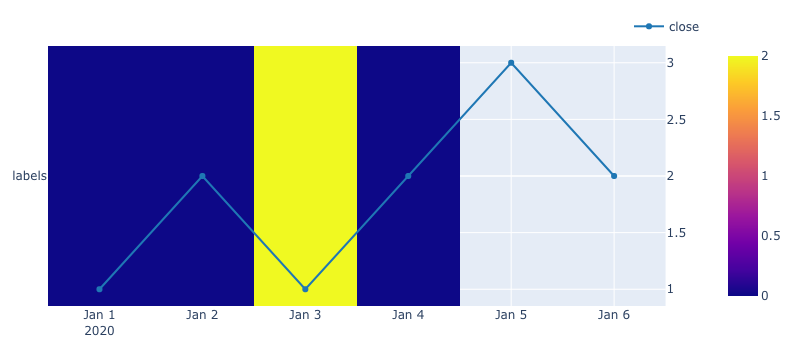

In [11]:
vbt.FIXLB.run(close['a'], n=2).plot().show_png()

In [12]:
print(vbt.MEANLB.run(close, window=(2, 3), ewm=(False, True), param_product=True).labels)

%timeit vbt.MEANLB.run(big_close, window=2)
%timeit vbt.MEANLB.run(big_close, window=np.arange(2, 10).tolist())

print(vbt.MEANLB.run(big_close, window=np.arange(2, 10).tolist()).wrapper.shape)

meanlb_window     2                                       3                    \
meanlb_ewm    False               True                False             True    
                  a         b         a         b         a         b       a   
2020-01-01     0.50 -0.166667  0.802469 -0.267490  0.666667 -0.222222  0.8125   
2020-01-02    -0.25  0.250000 -0.296296  0.296296  0.000000  0.000000 -0.1875   
2020-01-03     1.50 -0.500000  1.222222 -0.407407  1.333333 -0.444444  1.2500   
2020-01-04     0.25 -0.250000  0.333333 -0.333333       NaN       NaN     NaN   
2020-01-05      NaN       NaN       NaN       NaN       NaN       NaN     NaN   
2020-01-06      NaN       NaN       NaN       NaN       NaN       NaN     NaN   

meanlb_window            
meanlb_ewm               
                      b  
2020-01-01    -0.270833  
2020-01-02     0.187500  
2020-01-03    -0.416667  
2020-01-04          NaN  
2020-01-05          NaN  
2020-01-06          NaN  
26.6 ms ± 1.09 ms per loop (mean ± s

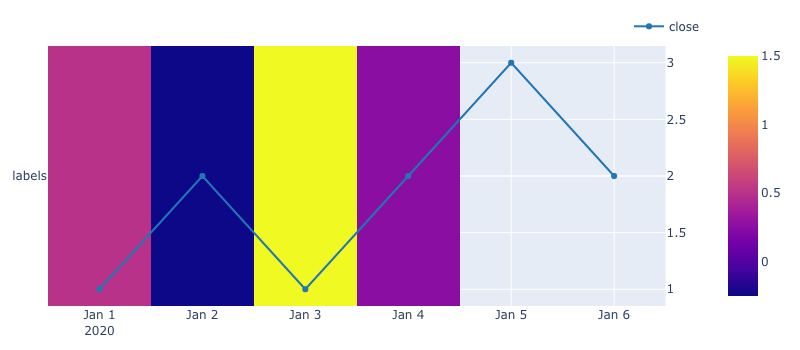

In [13]:
vbt.MEANLB.run(close['a'], window=2).plot().show_png()

In [14]:
print(vbt.LEXLB.run(close, pos_th=pos_ths, neg_th=neg_ths).labels)

%timeit vbt.LEXLB.run(big_close, pos_th=1, neg_th=0.5)

print(vbt.LEXLB.run(big_close, pos_th=1, neg_th=0.5).wrapper.shape)

lexlb_pos_th mix_0    mix_1    mix_2   
lexlb_neg_th mix_0    mix_1    mix_2   
                 a  b     a  b     a  b
2020-01-01      -1  1    -1  1    -1  1
2020-01-02       1 -1     0  0     0  0
2020-01-03      -1  1     0  0     0  0
2020-01-04       0  0     0  0     0  0
2020-01-05       1 -1     1 -1     0  0
2020-01-06      -1  1    -1  1     1 -1
28.5 ms ± 1.25 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
(1000, 1000)


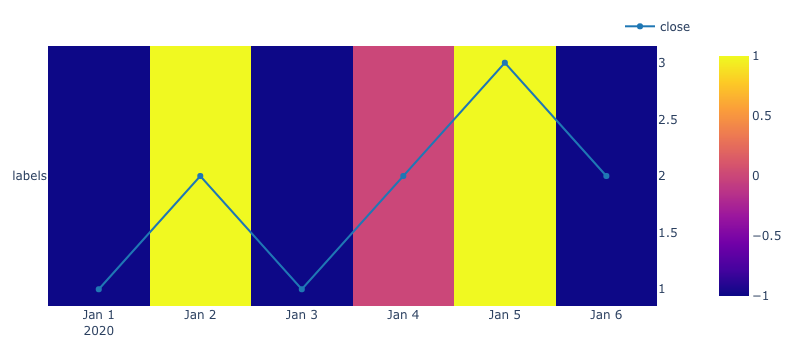

In [15]:
vbt.LEXLB.run(close['a'], pos_th=1, neg_th=0.5).plot().show_png()

In [16]:
print(vbt.TRENDLB.run(close, pos_th=pos_ths, neg_th=neg_ths, mode='Binary').labels)

%timeit vbt.TRENDLB.run(big_close, pos_th=1, neg_th=0.5, mode='Binary')

print(vbt.TRENDLB.run(big_close, pos_th=1, neg_th=0.5, mode='Binary').wrapper.shape)

trendlb_pos_th mix_0      mix_1      mix_2     
trendlb_neg_th mix_0      mix_1      mix_2     
trendlb_mode       0          0          0     
                   a    b     a    b     a    b
2020-01-01       1.0  0.0   1.0  0.0   1.0  0.0
2020-01-02       0.0  1.0   1.0  0.0   1.0  0.0
2020-01-03       1.0  0.0   1.0  0.0   1.0  0.0
2020-01-04       1.0  0.0   1.0  0.0   1.0  0.0
2020-01-05       0.0  1.0   0.0  1.0   1.0  0.0
2020-01-06       0.0  1.0   0.0  1.0   1.0  0.0
52.9 ms ± 1.44 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
(1000, 1000)


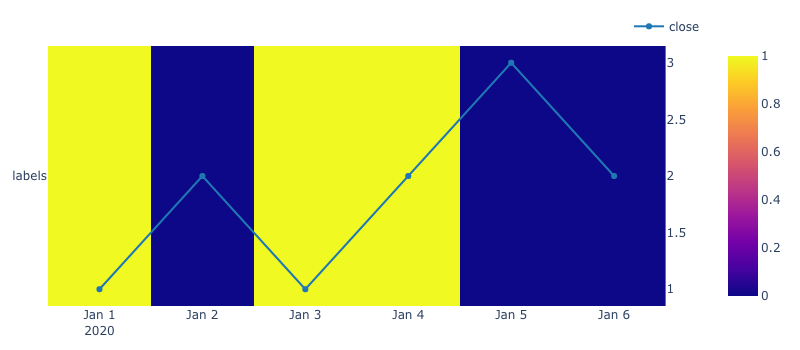

In [17]:
vbt.TRENDLB.run(close['a'], pos_th=1, neg_th=0.5, mode='Binary').plot().show_png()

In [18]:
print(vbt.TRENDLB.run(close, pos_th=pos_ths, neg_th=neg_ths, mode='BinaryCont').labels)

%timeit vbt.TRENDLB.run(big_close, pos_th=1, neg_th=0.5, mode='BinaryCont')

print(vbt.TRENDLB.run(big_close, pos_th=1, neg_th=0.5, mode='BinaryCont').wrapper.shape)

trendlb_pos_th mix_0      mix_1      mix_2     
trendlb_neg_th mix_0      mix_1      mix_2     
trendlb_mode       1          1          1     
                   a    b     a    b     a    b
2020-01-01       1.0  0.0   1.0  0.0   1.0  0.0
2020-01-02       0.0  1.0   0.5  0.5   0.5  0.5
2020-01-03       1.0  0.0   1.0  0.0   1.0  0.0
2020-01-04       0.5  0.5   0.5  0.5   0.5  0.5
2020-01-05       0.0  1.0   0.0  1.0   0.0  1.0
2020-01-06       1.0  0.0   1.0  0.0   0.5  0.5
151 ms ± 2.76 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
(1000, 1000)


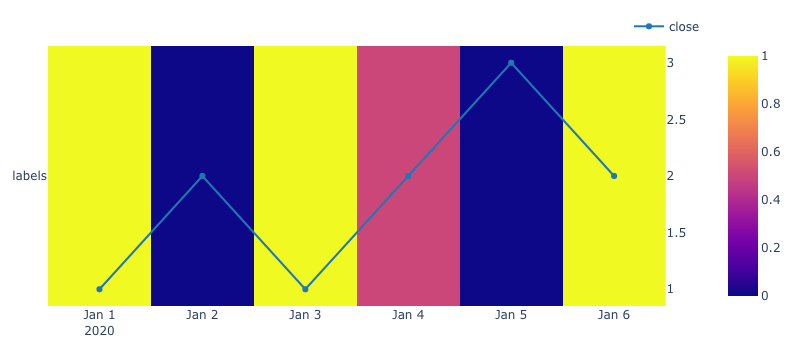

In [19]:
vbt.TRENDLB.run(close['a'], pos_th=1, neg_th=0.5, mode='BinaryCont').plot().show_png()

In [20]:
print(vbt.TRENDLB.run(close, pos_th=pos_ths, neg_th=neg_ths, mode='BinaryContSat').labels)

%timeit vbt.TRENDLB.run(big_close, pos_th=1, neg_th=0.5, mode='BinaryContSat')

print(vbt.TRENDLB.run(big_close, pos_th=1, neg_th=0.5, mode='BinaryContSat').wrapper.shape)

trendlb_pos_th     mix_0      mix_1          mix_2          
trendlb_neg_th     mix_0      mix_1          mix_2          
trendlb_mode           2          2              2          
                       a    b     a    b         a         b
2020-01-01      1.000000  0.0   1.0  0.0  0.888889  0.333333
2020-01-02      0.000000  1.0   0.5  0.5  0.444444  0.666667
2020-01-03      1.000000  0.0   1.0  0.0  0.888889  0.333333
2020-01-04      0.666667  0.0   0.5  0.5  0.444444  0.666667
2020-01-05      0.500000  1.0   0.5  1.0  0.000000  1.000000
2020-01-06      1.000000  0.0   1.0  0.0  0.444444  0.666667
70.5 ms ± 1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
(1000, 1000)


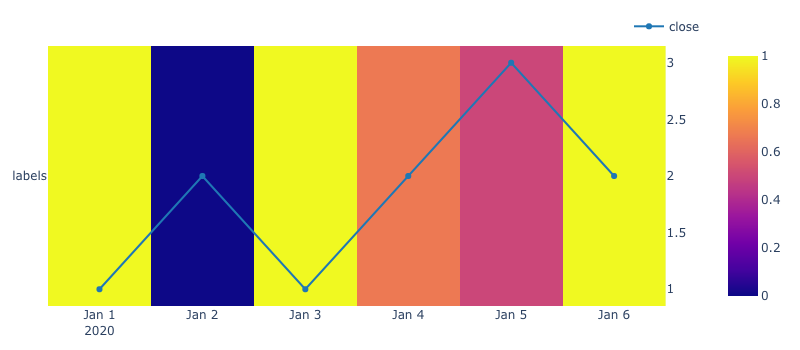

In [21]:
vbt.TRENDLB.run(close['a'], pos_th=1, neg_th=0.5, mode='BinaryContSat').plot().show_png()

In [22]:
print(vbt.TRENDLB.run(close, pos_th=pos_ths, neg_th=neg_ths, mode='PctChange').labels)

%timeit vbt.TRENDLB.run(big_close, pos_th=1, neg_th=0.5, mode='PctChange')

print(vbt.TRENDLB.run(big_close, pos_th=1, neg_th=0.5, mode='PctChange').wrapper.shape)

trendlb_pos_th     mix_0               mix_1               mix_2          
trendlb_neg_th     mix_0               mix_1               mix_2          
trendlb_mode           3                   3                   3          
                       a         b         a         b         a         b
2020-01-01      1.000000 -0.333333  2.000000 -0.666667  1.000000 -0.333333
2020-01-02     -0.500000  0.500000  0.500000 -0.500000  0.000000  0.000000
2020-01-03      2.000000 -0.666667  2.000000 -0.666667  1.000000 -0.333333
2020-01-04      0.500000 -0.500000  0.500000 -0.500000  0.000000  0.000000
2020-01-05     -0.333333  1.000000 -0.333333  1.000000 -0.333333  1.000000
2020-01-06      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
48.9 ms ± 324 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
(1000, 1000)


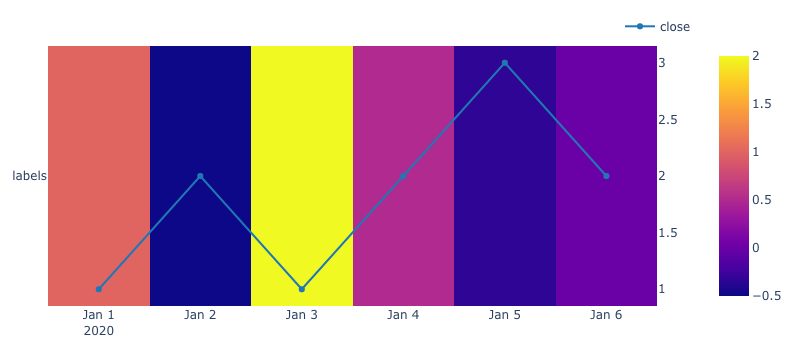

In [23]:
vbt.TRENDLB.run(close['a'], pos_th=1, neg_th=0.5, mode='PctChange').plot().show_png()

In [24]:
print(vbt.TRENDLB.run(close, pos_th=pos_ths, neg_th=neg_ths, mode='PctChangeNorm').labels)

%timeit vbt.TRENDLB.run(big_close, pos_th=1, neg_th=0.5, mode='PctChangeNorm')

print(vbt.TRENDLB.run(big_close, pos_th=1, neg_th=0.5, mode='PctChangeNorm').wrapper.shape)

trendlb_pos_th     mix_0               mix_1           mix_2          
trendlb_neg_th     mix_0               mix_1           mix_2          
trendlb_mode           4                   4               4          
                       a         b         a         b     a         b
2020-01-01      0.500000 -0.333333  0.666667 -0.666667   0.5 -0.333333
2020-01-02     -0.500000  0.333333  0.333333 -0.500000   0.0  0.000000
2020-01-03      0.666667 -0.666667  0.666667 -0.666667   0.5 -0.333333
2020-01-04      0.333333 -0.500000  0.333333 -0.500000   0.0  0.000000
2020-01-05     -0.333333  0.500000 -0.333333  0.500000  -0.5  1.000000
2020-01-06      0.000000  0.000000  0.000000  0.000000   0.0  0.000000
50.6 ms ± 473 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
(1000, 1000)


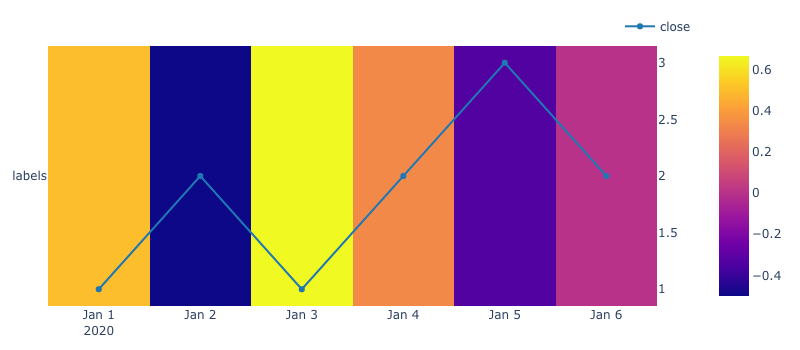

In [25]:
vbt.TRENDLB.run(close['a'], pos_th=1, neg_th=0.5, mode='PctChangeNorm').plot().show_png()

In [26]:
print(vbt.BOLB.run(close, window=1, pos_th=pos_ths, neg_th=neg_ths).labels)
print(vbt.BOLB.run(close, window=2, pos_th=pos_ths, neg_th=neg_ths).labels)

%timeit vbt.BOLB.run(big_close, window=2, pos_th=1, neg_th=0.5)
%timeit vbt.BOLB.run(big_close, window=np.arange(2, 10).tolist(), pos_th=1, neg_th=0.5)

print(vbt.BOLB.run(big_close, window=np.arange(2, 10).tolist(), pos_th=1, neg_th=0.5).wrapper.shape)

bolb_window     1                           
bolb_pos_th mix_0      mix_1      mix_2     
bolb_neg_th mix_0      mix_1      mix_2     
                a    b     a    b     a    b
2020-01-01    1.0 -1.0   0.0  0.0   0.0  0.0
2020-01-02   -1.0  1.0  -1.0  1.0  -1.0  1.0
2020-01-03    1.0 -1.0   0.0  0.0   0.0  0.0
2020-01-04    0.0 -1.0   0.0  0.0   0.0  0.0
2020-01-05    0.0  1.0   0.0  1.0   0.0  1.0
2020-01-06    0.0  0.0   0.0  0.0   0.0  0.0
bolb_window     2                           
bolb_pos_th mix_0      mix_1      mix_2     
bolb_neg_th mix_0      mix_1      mix_2     
                a    b     a    b     a    b
2020-01-01    1.0 -1.0   0.0  0.0   0.0  0.0
2020-01-02   -1.0  1.0  -1.0  1.0  -1.0  1.0
2020-01-03    1.0 -1.0   1.0 -1.0   0.0  0.0
2020-01-04    0.0 -1.0   0.0  0.0   0.0  0.0
2020-01-05    0.0  1.0   0.0  1.0   0.0  1.0
2020-01-06    0.0  0.0   0.0  0.0   0.0  0.0
34.7 ms ± 1.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
237 ms ± 5.79 ms per loop (mean 

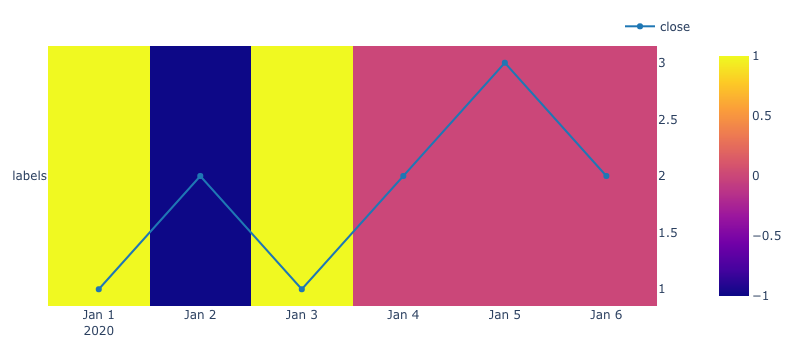

In [27]:
vbt.BOLB.run(close['a'], window=2, pos_th=1, neg_th=0.5).plot().show_png()